**Defining a Patient’s Health Status** 

For this task we require you to define a patient’s health status
based on their diagnostic data. The CCS map will be useful for this. Use whatever you think appropriate
to define a robust characterization of each patient’s health status. Ideally, your characterization would be
usef ul for establishing something like “Patient 0123 has anemia and skin infection.”

In [1]:
# Load important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
diagnosis = pd.read_csv("/content/Diagnosis.csv")

In [3]:

# As I don't want to tempered the orginal file. Therefore, I will make a copy of it.

diag_status = diagnosis.copy()

In [4]:
diag_status.head()

,Patient_id,Diag_date,ICD10
0,P00001,2015-12-06,N92.6
1,P00001,2015-12-06,O26.842
2,P00001,2015-12-13,O26.842
3,P00001,2016-02-29,O26.843
4,P00001,2016-03-27,O26.843


In [5]:
#lets check the dtypes

diag_status.dtypes

Patient_id    object
Diag_date     object
ICD10         object
dtype: object

In [6]:
icd10_numeric = []
# diag_status.shape
for i in range(10):
    icd10_numeric.append((diag_status.loc[diag_status['ICD10'].str.startswith(str(i)),'ICD10']).index)

for i in range(10):
    diag_status.drop(index = icd10_numeric[i], axis =0,inplace =True)

diag_status.head()

,Patient_id,Diag_date,ICD10
0,P00001,2015-12-06,N92.6
1,P00001,2015-12-06,O26.842
2,P00001,2015-12-13,O26.842
3,P00001,2016-02-29,O26.843
4,P00001,2016-03-27,O26.843


In [7]:
#lets check the null values

diag_status.isnull().sum()

Patient_id    0
Diag_date     6
ICD10         0
dtype: int64

In [8]:
#lets check the number of unique values or object in each column and lets drop those rows having nan values


print("~>" + "The number of unique value in Paitent_id {}".format(len(diag_status['Patient_id'].unique())/len(diag_status)*100))

print("~>" + "The number of unique value in Diag_date {}".format(len(diag_status['Diag_date'].unique())/len(diag_status)*100))

print("~>" + "The number of unique value in ICD10 {}".format(len(diag_status['ICD10'].unique())/len(diag_status)*100))

diag_status= diag_status.drop('Diag_date',axis = 1)


~>The number of unique value in Paitent_id 12.745254136282371
~>The number of unique value in Diag_date 0.1572477250636497
~>The number of unique value in ICD10 2.1600712088058724


In [9]:
#lets check the duplicate

bool_series = diag_status[["Patient_id","ICD10"]].duplicated()

# As the patient is diagonised by the same problem at different dates, So I will keep the record of latest date corresponding to that patient

diag_status.drop_duplicates(subset = ['Patient_id','ICD10'],keep = 'last',inplace =True)

In [10]:
diag_status.head()

,Patient_id,ICD10
0,P00001,N92.6
2,P00001,O26.842
7,P00001,O26.843
8,P00001,O34.21
9,P00001,O80


In [11]:
#Lets check the %age of unique values again


print("~>" + "The number of unique value in Paitent_id {}".format(len(diag_status['Patient_id'].unique())/len(diag_status)*100))

print("~>" + "The number of unique value in ICD10 {}".format(len(diag_status['ICD10'].unique())/len(diag_status)*100))

~>The number of unique value in Paitent_id 20.08910325508914
~>The number of unique value in ICD10 3.40470994834975


In [12]:
# Now it is given in the problem that ccs.csv will be used to find the health status
# Lets load it and see what is it inside?

ccs_status = pd.read_csv("/content/ccs.csv")

In [13]:
# Lets see what is in CCS again..

ccs_status.head()

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection
2,A009,"Cholera, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection
3,A0100,"Typhoid fever, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection
4,A0101,Typhoid meningitis,Diseases of the nervous system and sense organs,Central nervous system infection,Meningitis (except that caused by tuberculosis...


In [14]:
ccs_status.diag.unique

<bound method Series.unique of 0         A000
1         A001
2         A009
3        A0100
4        A0101
         ...  
72162    Z9912
72163     Z992
72164     Z993
72165    Z9981
72166    Z9989
Name: diag, Length: 72167, dtype: object>

Reference :- https://www.aao.org/eyenet/article/icd-10-how-to-find-correct-code-in-5-steps
In this site, I learned how to read ICD10 codes. This information is helpful to decode the above dataset.I just have to remove the point in character and it turns into the diag (ccs_status) that is mentioned in the diag column of ccs.

In [15]:
diag_status['ICD10'] =  diag_status['ICD10'].str.replace('.',"")

In [16]:
diag_status.head()

,Patient_id,ICD10
0,P00001,N926
2,P00001,O26842
7,P00001,O26843
8,P00001,O3421
9,P00001,O80


In [17]:
ccs_status.head()

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection
2,A009,"Cholera, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection
3,A0100,"Typhoid fever, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection
4,A0101,Typhoid meningitis,Diseases of the nervous system and sense organs,Central nervous system infection,Meningitis (except that caused by tuberculosis...


In [18]:
ccs_status.isnull().sum()

diag          0
diag_desc     0
ccs_1_desc    0
ccs_2_desc    0
ccs_3_desc    0
dtype: int64

In [19]:
ICD_10 = diag_status['ICD10']
len(ICD_10)

418391

In [20]:
ccs_health = ccs_status.copy()
(ccs_health['diag'] == 'O80').sum()

1

In [21]:
common = ccs_health.merge(ICD_10, left_on = 'diag',right_on = 'ICD10', indicator =True, how ='left')

In [22]:
common.head()

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc,ICD10,_merge
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
2,A009,"Cholera, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
3,A0100,"Typhoid fever, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
4,A0101,Typhoid meningitis,Diseases of the nervous system and sense organs,Central nervous system infection,Meningitis (except that caused by tuberculosis...,NaN,left_only


In [23]:
bool_series = common[['diag','ICD10']].duplicated()
common[bool_series]

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc,ICD10,_merge
15,A020,Salmonella enteritis,Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,A020,both
16,A020,Salmonella enteritis,Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,A020,both
17,A020,Salmonella enteritis,Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,A020,both
36,A041,Enterotoxigenic Escherichia coli infection,Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,A041,both
37,A041,Enterotoxigenic Escherichia coli infection,Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,A041,both
...,...,...,...,...,...,...,...
476479,Z98890,Other specified postprocedural states,Residual codes; unclassified; all E codes [259...,,Residual codes; unclassified,Z98890,both
476481,Z98891,History of uterine scar from previous surgery,Residual codes; unclassified; all E codes [259...,,Residual codes; unclassified,Z98891,both
476484,Z9911,Dependence on respirator [ventilator] status,Diseases of the respiratory system,Respiratory failure; insufficiency; arrest (ad...,Respiratory failure; insufficiency; arrest (ad...,Z9911,both
476485,Z9911,Dependence on respirator [ventilator] status,Diseases of the respiratory system,Respiratory failure; insufficiency; arrest (ad...,Respiratory failure; insufficiency; arrest (ad...,Z9911,both


In [24]:
#Lets remove the duplicates
#As same ICD10 code appears more than one time
common.drop_duplicates(subset = ['diag','ICD10'],keep = 'first',inplace =True)

In [25]:
common.head(10)

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc,ICD10,_merge
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
2,A009,"Cholera, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
3,A0100,"Typhoid fever, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
4,A0101,Typhoid meningitis,Diseases of the nervous system and sense organs,Central nervous system infection,Meningitis (except that caused by tuberculosis...,NaN,left_only
5,A0102,Typhoid fever with heart involvement,Infectious and parasitic diseases,Bacterial infection,Bacterial infection; unspecified site,NaN,left_only
6,A0103,Typhoid pneumonia,Diseases of the respiratory system,Respiratory infections,Pneumonia (except that caused by tuberculosis ...,NaN,left_only
7,A0104,Typhoid arthritis,Diseases of the musculoskeletal system and con...,Infective arthritis and osteomyelitis (except ...,Infective arthritis and osteomyelitis (except ...,NaN,left_only
8,A0105,Typhoid osteomyelitis,Diseases of the musculoskeletal system and con...,Infective arthritis and osteomyelitis (except ...,Infective arthritis and osteomyelitis (except ...,NaN,left_only
9,A0109,Typhoid fever with other complications,Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only


In [26]:
common.ccs_1_desc.value_counts()

Injury and poisoning                                                                 40432
Residual codes; unclassified; all E codes [259. and 260.]                             7621
Diseases of the musculoskeletal system and connective tissue                          5392
Diseases of the nervous system and sense organs                                       4017
Complications of pregnancy; childbirth; and the puerperium                            2332
Mental Illness                                                                        2012
Neoplasms                                                                             1729
Endocrine; nutritional; and metabolic diseases and immunity disorders                 1492
Diseases of the circulatory system                                                    1222
Diseases of the digestive system                                                       941
Infectious and parasitic diseases                                                      923

In [27]:
#test case to check whether duplicates removed or not
(common['ICD10'] == 'N926').sum()

1

In [28]:
### Solution

In [29]:
common_icd = {} 

for i in range(len(common)):
    if (common['_merge'].iloc[i] == 'both'):
        common_icd[common['ICD10'].iloc[i]] = common['ccs_1_desc'].iloc[i] 

In [30]:
common_icd

{'A020': 'Diseases of the digestive system',
 'A038': 'Diseases of the digestive system',
 'A039': 'Diseases of the digestive system',
 'A040': 'Diseases of the digestive system',
 'A041': 'Diseases of the digestive system',
 'A043': 'Diseases of the digestive system',
 'A044': 'Diseases of the digestive system',
 'A045': 'Diseases of the digestive system',
 'A047': 'Diseases of the digestive system',
 'A0471': 'Diseases of the digestive system',
 'A0472': 'Diseases of the digestive system',
 'A048': 'Diseases of the digestive system',
 'A049': 'Diseases of the digestive system',
 'A050': 'Diseases of the digestive system',
 'A058': 'Diseases of the digestive system',
 'A059': 'Diseases of the digestive system',
 'A060': 'Diseases of the digestive system',
 'A069': 'Diseases of the digestive system',
 'A071': 'Diseases of the digestive system',
 'A073': 'Diseases of the digestive system',
 'A078': 'Diseases of the digestive system',
 'A080': 'Diseases of the digestive system',
 'A0811'

In [31]:
# from the above output it is clear that some diseases names write too long in ccs_3_desc..
# I will try to make them short so that they are readable.
# Ultimately I have to define patient health status. So I'm thinking like why don't I replace all the cancer with cancer and so on.
#Lets make a copy of common.

common_new = common.copy()
common_new.head()

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc,ICD10,_merge
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
2,A009,"Cholera, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
3,A0100,"Typhoid fever, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
4,A0101,Typhoid meningitis,Diseases of the nervous system and sense organs,Central nervous system infection,Meningitis (except that caused by tuberculosis...,NaN,left_only


In [32]:
list(common_icd.values())

['Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 'Diseases of the digestive system',
 

In [33]:
common_new.loc[common_new['ccs_1_desc'].str.startswith(''),'ccs_1_desc'].unique()

array(['Diseases of the digestive system',
       'Diseases of the nervous system and sense organs',
       'Infectious and parasitic diseases',
       'Diseases of the respiratory system',
       'Diseases of the musculoskeletal system and connective tissue',
       'Diseases of the skin and subcutaneous tissue',
       'Certain conditions originating in the perinatal period',
       'Complications of pregnancy; childbirth; and the puerperium',
       'Diseases of the circulatory system',
       'Diseases of the genitourinary system',
       'Symptoms; signs; and ill-defined conditions and factors influencing health status',
       'Neoplasms', 'Diseases of the blood and blood-forming organs',
       'Injury and poisoning',
       'Endocrine; nutritional; and metabolic diseases and immunity disorders',
       'Congenital anomalies', 'Mental Illness',
       'Residual codes; unclassified; all E codes [259. and 260.]'],
      dtype=object)

In [34]:
common_new['ccs_1_desc'].value_counts()

Injury and poisoning                                                                 40432
Residual codes; unclassified; all E codes [259. and 260.]                             7621
Diseases of the musculoskeletal system and connective tissue                          5392
Diseases of the nervous system and sense organs                                       4017
Complications of pregnancy; childbirth; and the puerperium                            2332
Mental Illness                                                                        2012
Neoplasms                                                                             1729
Endocrine; nutritional; and metabolic diseases and immunity disorders                 1492
Diseases of the circulatory system                                                    1222
Diseases of the digestive system                                                       941
Infectious and parasitic diseases                                                      923

Large  description ----------> Concise information

In [35]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Infectious and parasitic diseases'], 'Parasitic deseases')

In [36]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Diseases of the nervous system and sense organs'],'Nervous system disorder')
common_new.head()

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc,ICD10,_merge
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
2,A009,"Cholera, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
3,A0100,"Typhoid fever, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection,NaN,left_only
4,A0101,Typhoid meningitis,Nervous system disorder,Central nervous system infection,Meningitis (except that caused by tuberculosis...,NaN,left_only


In [37]:
common_new.loc[common_new['ccs_1_desc'].str.startswith('Endo'),'ccs_1_desc'].unique()

array(['Endocrine; nutritional; and metabolic diseases and immunity disorders'],
      dtype=object)

In [38]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Endocrine; nutritional; and metabolic diseases and immunity disorders'], 'Immunity disorders')

In [39]:
common_new.loc[common_new['ccs_1_desc'].str.startswith('Other'),'ccs_1_desc'].unique()

array([], dtype=object)

In [40]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Malignant neoplasm without specification of site'],'Neoplasm')

In [41]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Diseases of the skin and subcutaneous tissue'], 'Skin & Subcutaneous Tissue Disorder')

In [42]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Diseases of the circulatory system'], 'Circulatory diseases')

In [43]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Diseases of the respiratory system'], 'Respiratory infection')

In [44]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Diseases of the blood and blood-forming organs'], 'Anemia')

In [45]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Certain conditions originating in the perinatal period'], 'Perinatal diseases')

In [46]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Diseases of the musculoskeletal system and connective tissue'],'Connective tissue disorder')

In [47]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Complications of pregnancy; childbirth; and the puerperium'], 'Pragnancy Complications')

In [48]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Diseases of the genitourinary system'], 'Genitourinary system diseases ')

In [49]:
common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Diseases of the digestive system'], 'Digestive diseases')
common_new.head()

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc,ICD10,_merge
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",Digestive diseases,Intestinal infection [135.],Intestinal infection,NaN,left_only
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Digestive diseases,Intestinal infection [135.],Intestinal infection,NaN,left_only
2,A009,"Cholera, unspecified",Digestive diseases,Intestinal infection [135.],Intestinal infection,NaN,left_only
3,A0100,"Typhoid fever, unspecified",Digestive diseases,Intestinal infection [135.],Intestinal infection,NaN,left_only
4,A0101,Typhoid meningitis,Nervous system disorder,Central nervous system infection,Meningitis (except that caused by tuberculosis...,NaN,left_only


In [50]:
common_new['ccs_1_desc'].value_counts()

Injury and poisoning                                                                 40432
Residual codes; unclassified; all E codes [259. and 260.]                             7621
Connective tissue disorder                                                            5392
Nervous system disorder                                                               4017
Pragnancy Complications                                                               2332
Mental Illness                                                                        2012
Neoplasms                                                                             1729
Immunity disorders                                                                    1492
Circulatory diseases                                                                  1222
Digestive diseases                                                                     941
Parasitic deseases                                                                     923

In [51]:
# Lets see the corresponding diag_report of Residual codes; unclassified; all E codes [259. and 260.]

report = common_new[common_new['ccs_1_desc']=='Residual codes; unclassified; all E codes [259. and 260.]']
report.head()

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc,ICD10,_merge
60564,G4700,"Insomnia, unspecified",Residual codes; unclassified; all E codes [259...,,Residual codes; unclassified,G4700,both
61099,G4701,Insomnia due to medical condition,Residual codes; unclassified; all E codes [259...,,Residual codes; unclassified,G4701,both
61110,G4709,Other insomnia,Residual codes; unclassified; all E codes [259...,,Residual codes; unclassified,G4709,both
61179,G4710,"Hypersomnia, unspecified",Residual codes; unclassified; all E codes [259...,,Residual codes; unclassified,G4710,both
61280,G4711,Idiopathic hypersomnia with long sleep time,Residual codes; unclassified; all E codes [259...,,Residual codes; unclassified,G4711,both


In [52]:
common_new.head()

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc,ICD10,_merge
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",Digestive diseases,Intestinal infection [135.],Intestinal infection,NaN,left_only
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Digestive diseases,Intestinal infection [135.],Intestinal infection,NaN,left_only
2,A009,"Cholera, unspecified",Digestive diseases,Intestinal infection [135.],Intestinal infection,NaN,left_only
3,A0100,"Typhoid fever, unspecified",Digestive diseases,Intestinal infection [135.],Intestinal infection,NaN,left_only
4,A0101,Typhoid meningitis,Nervous system disorder,Central nervous system infection,Meningitis (except that caused by tuberculosis...,NaN,left_only


In [53]:
# As we can see from the above output that diag for Residual Code... are varying. Therefore lets replace 
# it with some common word which collectively explain the situation....
# So I will replace it with "disorder" as in medical terms disorder means a disturbance of normal functioning of mind or body.

common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Residual codes; unclassified; all E codes [259. and 260.]'],'Disorder')
print(common_new['ccs_1_desc'].value_counts())
common_new.head()

Injury and poisoning                                                                 40432
Disorder                                                                              7621
Connective tissue disorder                                                            5392
Nervous system disorder                                                               4017
Pragnancy Complications                                                               2332
Mental Illness                                                                        2012
Neoplasms                                                                             1729
Immunity disorders                                                                    1492
Circulatory diseases                                                                  1222
Digestive diseases                                                                     941
Parasitic deseases                                                                     923

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc,ICD10,_merge
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",Digestive diseases,Intestinal infection [135.],Intestinal infection,NaN,left_only
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Digestive diseases,Intestinal infection [135.],Intestinal infection,NaN,left_only
2,A009,"Cholera, unspecified",Digestive diseases,Intestinal infection [135.],Intestinal infection,NaN,left_only
3,A0100,"Typhoid fever, unspecified",Digestive diseases,Intestinal infection [135.],Intestinal infection,NaN,left_only
4,A0101,Typhoid meningitis,Nervous system disorder,Central nervous system infection,Meningitis (except that caused by tuberculosis...,NaN,left_only


In [54]:
# Codes for symptoms, signs, and ill-defined conditions from Chapter 18 of the ICD-10-CM 
#coding manual cannot be used as principal diagnosis or reasons for outpatient encounters 
#when related diagnosis has been established, they may be assigned as an additional diagnosis

common_new['ccs_1_desc'] = common_new['ccs_1_desc'].replace(['Symptoms; signs; and ill-defined conditions and factors influencing health status'],'Additional diagnosis')
common_new['ccs_1_desc'].value_counts()

Injury and poisoning                   40432
Disorder                                7621
Connective tissue disorder              5392
Nervous system disorder                 4017
Pragnancy Complications                 2332
Mental Illness                          2012
Neoplasms                               1729
Immunity disorders                      1492
Circulatory diseases                    1222
Digestive diseases                       941
Parasitic deseases                       923
Congenital anomalies                     832
Skin & Subcutaneous Tissue Disorder      784
Additional diagnosis                     724
Genitourinary system diseases            715
Perinatal diseases                       438
Respiratory infection                    384
Anemia                                   177
Name: ccs_1_desc, dtype: int64

In [55]:
 # lets make another dictionary with new data

common_icd_new = {} 

for i in range(len(common)):
    if (common_new['_merge'].iloc[i] == 'both'):
        common_icd_new[common['ICD10'].iloc[i]] = common_new['ccs_1_desc'].iloc[i] 

In [56]:
common_icd_new

{'A020': 'Digestive diseases',
 'A038': 'Digestive diseases',
 'A039': 'Digestive diseases',
 'A040': 'Digestive diseases',
 'A041': 'Digestive diseases',
 'A043': 'Digestive diseases',
 'A044': 'Digestive diseases',
 'A045': 'Digestive diseases',
 'A047': 'Digestive diseases',
 'A0471': 'Digestive diseases',
 'A0472': 'Digestive diseases',
 'A048': 'Digestive diseases',
 'A049': 'Digestive diseases',
 'A050': 'Digestive diseases',
 'A058': 'Digestive diseases',
 'A059': 'Digestive diseases',
 'A060': 'Digestive diseases',
 'A069': 'Digestive diseases',
 'A071': 'Digestive diseases',
 'A073': 'Digestive diseases',
 'A078': 'Digestive diseases',
 'A080': 'Digestive diseases',
 'A0811': 'Digestive diseases',
 'A0819': 'Digestive diseases',
 'A082': 'Digestive diseases',
 'A0839': 'Digestive diseases',
 'A084': 'Digestive diseases',
 'A088': 'Digestive diseases',
 'A09': 'Digestive diseases',
 'A150': 'Parasitic deseases',
 'A156': 'Parasitic deseases',
 'A157': 'Parasitic deseases',
 'A1

In [57]:
diag_status['ICD10'].replace(common_icd_new,inplace = True)

In [58]:
diag_status.head()

,Patient_id,ICD10
0,P00001,Genitourinary system diseases
2,P00001,Pragnancy Complications
7,P00001,Pragnancy Complications
8,P00001,Pragnancy Complications
9,P00001,Pragnancy Complications


In [59]:
bool_series = diag_status[["Patient_id","ICD10"]].duplicated()

In [60]:
diag_status[bool_series]

,Patient_id,ICD10
7,P00001,Pragnancy Complications
8,P00001,Pragnancy Complications
9,P00001,Pragnancy Complications
19,P00002,Circulatory diseases
20,P00002,Circulatory diseases
...,...,...
660081,P99997,Pragnancy Complications
660082,P99997,Pragnancy Complications
660083,P99997,Pragnancy Complications
660084,P99997,Pragnancy Complications


In [61]:
diag_status.drop_duplicates(subset = ['Patient_id','ICD10'],keep = 'last',inplace =True)

In [62]:
diag_status.head()

,Patient_id,ICD10
0,P00001,Genitourinary system diseases
9,P00001,Pragnancy Complications
14,P00001,Perinatal diseases
15,P00002,Disorder
16,P00002,Mental Illness


In [63]:
diag_status.reset_index(inplace = True)
diag_status.drop('index',axis =1,inplace =True)

In [64]:
diag_status.ICD10.unique()

array(['Genitourinary system diseases ', 'Pragnancy Complications',
       'Perinatal diseases', 'Disorder', 'Mental Illness',
       'Additional diagnosis', 'Circulatory diseases',
       'Connective tissue disorder', 'Parasitic deseases',
       'Nervous system disorder', 'Respiratory infection',
       'Immunity disorders', 'Congenital anomalies',
       'Injury and poisoning', 'Skin & Subcutaneous Tissue Disorder',
       'Digestive diseases', 'Neoplasms', 'Anemia', 'N0459', 'Z80401',
       'D370', 'O262', 'KHDX', 'S2700XX', 'S0006', 'S42413', 'N304',
       'K590', 'Z001', 'V700', 'H102', 'Z000', 'J011', 'I838', 'M7512',
       'S6991', 'S02612', 'M201', 'V221', 'S90112', 'S93401', 'S00',
       'C445', 'I8389', 'R2970', 'Z121', 'Z4881', 'O4788', 'H901', 'T420',
       'S80211', 'M2511', 'H40133', 'MHDX', 'S83501', 'Z0141', 'S92352',
       'E078', 'H40113', 'C4703', 'K112', 'Q335XX1', 'O29', 'F784',
       'R5167', 'C5091', 'S300', 'S73', 'H1042', 'K5280', 'M7511', 'H663',
     

In [65]:
diag_status.ICD10.value_counts()

Additional diagnosis          50652
Respiratory infection         29131
Connective tissue disorder    19058
Nervous system disorder       18814
Immunity disorders            16025
                              ...  
H663                              1
Z80401                            1
R8882                             1
M350                              1
S2700XX                           1
Name: ICD10, Length: 89, dtype: int64

In [66]:
lst = ['N0459',
       'Z80401', 'D370', 'O262', 'KHDX', 'S2700XX', 'S0006', 'S42413',
       'N304', 'K590', 'Z001', 'V700', 'H102', 'Z000', 'J011', 'I838',
       'M7512', 'S6991', 'S02612', 'M201', 'V221', 'S90112', 'S93401',
       'S00', 'C445', 'I8389', 'R2970', 'Z121', 'Z4881', 'O4788', 'H901',
       'T420', 'S80211', 'M2511', 'H40133', 'MHDX', 'S83501', 'Z0141',
       'S92352', 'E078', 'H40113', 'C4703', 'K112', 'Q335XX1', 'O29',
       'F784', 'R5167', 'C5091', 'S300', 'S73', 'H1042', 'K5280', 'M7511',
       'H663', 'M1116', 'J4590', 'S9211A', 'J454', 'R8882', 'S83512',
       'F042', 'M97645', 'S86011', 'R20', 'N6480', 'M350', 'S76111',
       'V509', 'S99', 'B08', 'M2161']

# As I don't have any information about those codes in ccs dataset, but these code still
# represent a diseases, so I will replace these code with diseases(unspecified).

diag_status['ICD10'] = diag_status['ICD10'].replace(['N0459',
       'Z80401', 'D370', 'O262', 'KHDX', 'S2700XX', 'S0006', 'S42413',
       'N304', 'K590', 'Z001', 'V700', 'H102', 'Z000', 'J011', 'I838',
       'M7512', 'S6991', 'S02612', 'M201', 'V221', 'S90112', 'S93401',
       'S00', 'C445', 'I8389', 'R2970', 'Z121', 'Z4881', 'O4788', 'H901',
       'T420', 'S80211', 'M2511', 'H40133', 'MHDX', 'S83501', 'Z0141',
       'S92352', 'E078', 'H40113', 'C4703', 'K112', 'Q335XX1', 'O29',
       'F784', 'R5167', 'C5091', 'S300', 'S73', 'H1042', 'K5280', 'M7511',
       'H663', 'M1116', 'J4590', 'S9211A', 'J454', 'R8882', 'S83512',
       'F042', 'M97645', 'S86011', 'R20', 'N6480', 'M350', 'S76111',
       'V509', 'S99', 'B08', 'M2161'],'Diseases(Unspecified)')

In [67]:
#lets use  grouby operation and aggregate patient diseases  into one blocks
# before this let me make a copy of my csv

diag_health = diag_status.copy()

In [68]:
diag_health = diag_health.groupby("Patient_id").agg(Diseases = ('ICD10', lambda x: ", ".join(x))).reset_index()

In [69]:
diag_health

,Diseases
Patient_id,
P00001,"Genitourinary system diseases , Pragnancy Comp..."
P00002,"Disorder, Mental Illness, Additional diagnosis..."
P00003,Connective tissue disorder
P00004,"Additional diagnosis, Parasitic deseases"
P00005,Nervous system disorder
...,...
P99995,"Anemia, Mental Illness"
P99996,"Connective tissue disorder, Additional diagnos..."
P99997,"Perinatal diseases, Pragnancy Complications"


In [71]:
diag_status.head()

,Patient_id,ICD10
0,P00001,Genitourinary system diseases
1,P00001,Pragnancy Complications
2,P00001,Perinatal diseases
3,P00002,Disorder
4,P00002,Mental Illness


Text(0, 0.5, 'Diseases')

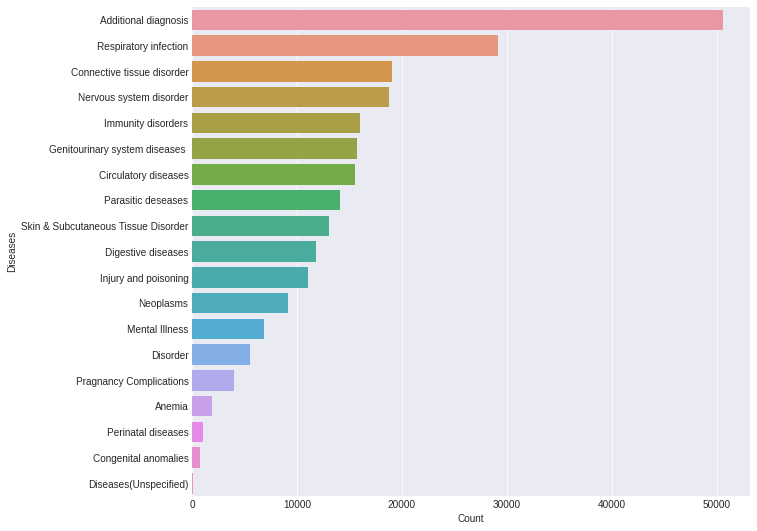

In [72]:
# Lets see which diseases  maximum number of times

plt.figure(figsize = (10,9))
plt.style.use('seaborn-darkgrid')
diag_status['ICD10'].value_counts().plot(kind = 'barh')
sns.barplot(y = diag_status['ICD10'].value_counts().index, x = diag_status["ICD10"].value_counts())
plt.xlabel("Count")
plt.ylabel("Diseases")

In [73]:
diag_status.head()

,Patient_id,ICD10
0,P00001,Genitourinary system diseases
1,P00001,Pragnancy Complications
2,P00001,Perinatal diseases
3,P00002,Disorder
4,P00002,Mental Illness


In [76]:
diag_health.to_csv("problem_1_output.csv", index = True)